In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import matplotlib.patheffects as PathEffects
from IPython.display import HTML
from itertools import chain
import datetime

In [2]:
df = pd.read_csv("./DataSet/daily.csv", usecols=['date', 'state', 'positive', 'death'])
df.head(-1)

,date,state,positive,death
0,20200411,AK,257.0,8.0
1,20200411,AL,3191.0,91.0
2,20200411,AR,1226.0,24.0
3,20200411,AS,0.0,NaN
4,20200411,AZ,3393.0,108.0
...,...,...,...,...
2050,20200302,RI,1.0,NaN
2051,20200302,WA,34.0,11.0
2052,20200301,RI,1.0,NaN
2053,20200301,WA,30.0,8.0


In [3]:
colors = dict(zip(
    ["AL",      "AK",      "AS",       "AZ",      "AR",      "CA",      "CO",      "CT",      "DE",      "FL",      "GA",      "HI",      "ID",       "IL",      "IN",      "IA",      "KS",      "KY",      "LA",      "ME",      "MD",      "MA",       "MI",       "MN",      "MS",      "MO",      "MT",      "NE",      "NV",      "NH",      "NJ",      "NM",      "NY",      "NC",      "ND",      "OH",      "OK",      "OR",       "PA",       "RI",      "SC",      "SD",      "TN",      "TX",       "UT",       "VT",      "VA",      "WA",      "WV",      "WI",      "WY"],
    ["#ff0000", "#000000", "#000000", "#16256b", "#000000",  "#000080", "#000000", "#000000", "#71a1a0", "#FF7F00", "#FF0000", "#f00c0f", "#ff0000", "#000000", "#0000ff", "#000000", "#000000", "#000000", "#0000ff", "#000000", "#ff0000", "#0000ff", "#000000",  "#800080", "#000000", "#000000", "#000000", "#000000", "#C0C0C0", "#ffa500", "#F0DC82", "#ff0000", "#000080", "#ff0000", "#000000", "#ff0000", "#008000", "#000080", "#0000ff", "#000000", "#00416A", "#000080", "#FF7F00", "#0000ff", "#FFCC33", "#006400", "#000000", "#000000", "#CFB53B", "#adb0ff", "#a52a2a"]
))

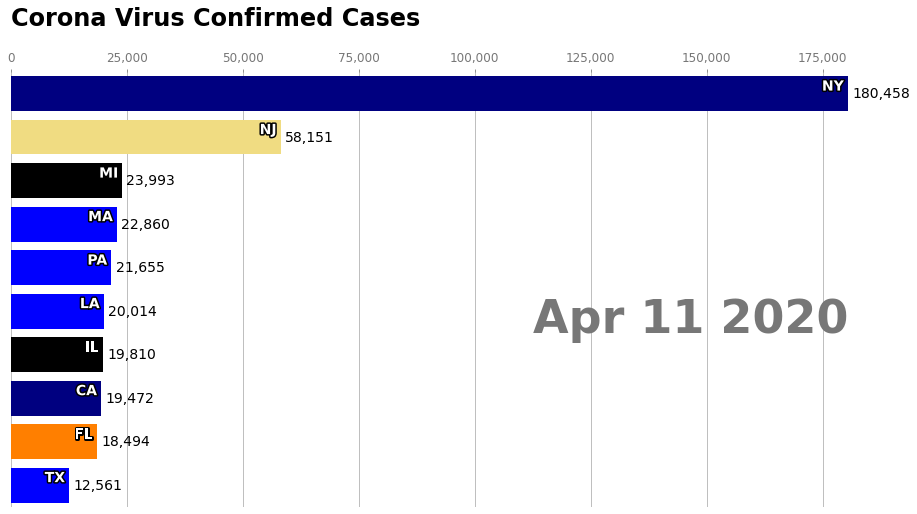

In [4]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(date):
    d = datetime.date(year=int(str(date)[0:4]), month=int(str(date)[4:6]), day=int(str(date)[6:8]))
    dff = df[df['date'].eq(date)].sort_values(by='positive', ascending=True).tail(10)
    ax.clear()
    state = dff['state']
    ax.barh(dff['state'], dff['positive'],  color=[colors[x] for x in state])
    dx = dff['positive'].max() / 200
    for i, (value, name) in enumerate(zip(dff['positive'], dff['state'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom', color="#ffffff").set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])
        #ax.text(value-dx, i-.25, "deaths :" + str(group_lk[name]), size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, d.strftime("%b %d %Y"), transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    #ax.text(0, 1.06, 'Confirmed Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'Corona Virus Confirmed Cases',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    # ax.text(1, 0, 'by @pratapvardhan; credit @jburnmurdoch', transform=ax.transAxes, color='#777777', ha='right',
    #         bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(20200411)

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.rcParams['animation.ffmpeg_path'] = 'C:\\Users\\eiden.m\\Desktop\\Spring Semester 2020\\DataViz\\ffmpeg-20200413-59e3a9a-win64-static\\ffmpeg\\bin\\ffmpeg.exe'
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
animator = animation.FuncAnimation(fig, draw_barchart, frames=chain(range(20200228, 20200230), range(20200301, 20200332), range(20200401, 20200412)))
animator.save("video.mp4", writer=writer)

posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


posx and posy should be finite values


Error in callback <function flush_figures at 0x00000206A49992F0> (for post_execute):


KeyboardInterrupt: 